In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url= 'https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#ver cuantos registros y variables contiene mi dataset
df.shape

(891, 12)

In [7]:
#conocer los tipos de datos de mi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#ver valores nulos
#valores vacios en Age, Cabin, Embarked
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#primera hipotesis: afectara en sexo para esta supervivencia?
mujeres = df.loc[df.Sex=='female']['Survived']
tasa_mujeres = sum(mujeres) / len(mujeres)

In [18]:
tasa_mujeres

0.7420382165605095

In [19]:
hombres = df.loc[df.Sex=='male']['Survived']
tasa_hombres = sum(hombres) / len(hombres)

In [20]:
tasa_hombres

0.18890814558058924

In [22]:
#de una variable numerica la pasamos a categorica
df['name_survived'] = df['Survived'].map({0: 'No_sobrevivio',1:'Sobrevivio'})

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

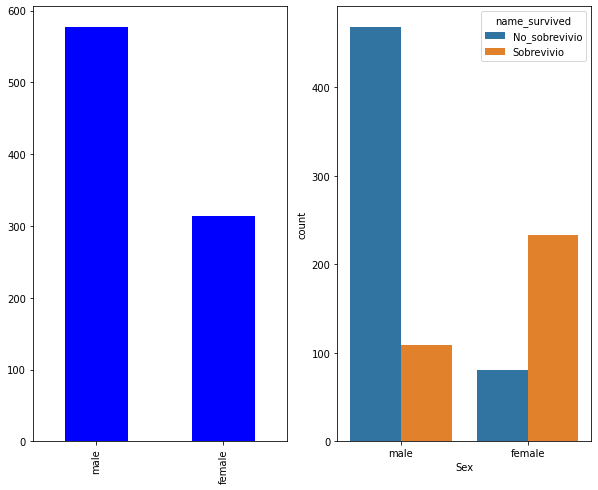

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
#cuantos registros hay por hombre y mujer
df['Sex'].value_counts().plot.bar(color='blue',ax=ax[0])
#cuantos registros hay por hombre y mujer segun la supervivencia
sns.countplot('Sex', hue='name_survived', data=df, ax=ax[1])

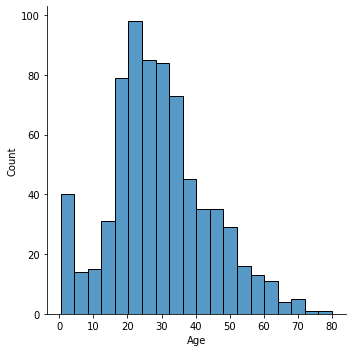

In [27]:
#para ver la distribucion de la edad, para ver si la edad afecta la supervivencia
sns.displot(df['Age']. dropna())

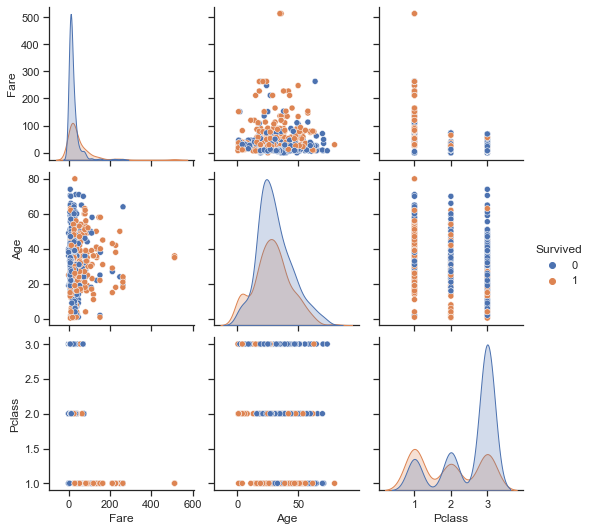

In [29]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = [ 'Fare','Age','Pclass'],
hue="Survived")
plt.show()

In [31]:
corr_titanic = df.corr(method='pearson')

<AxesSubplot:>

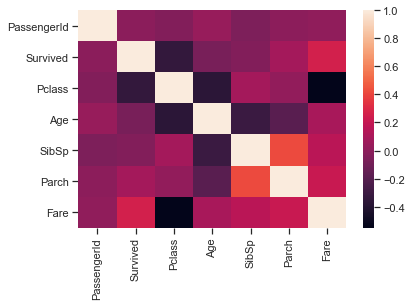

In [32]:
sns.heatmap(corr_titanic)